# Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Loading Data

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
# Create a DataFrame from X and y
data = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y': y})
data

,X0,X1,y
0,-0.636405,-0.368702,1
1,-0.244660,-0.736592,1
2,-0.465971,-1.066877,0
3,-0.709998,-0.408419,1
4,0.702322,-0.517301,1
...,...,...,...
95,-0.787431,-0.112491,1
96,0.276026,0.887306,0
97,-0.835059,0.020756,1
98,0.268598,1.004521,0


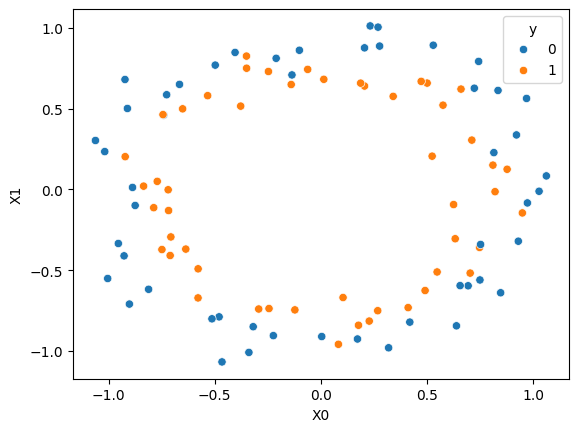

In [4]:
# Plot using Seaborn scatterplot
sns.scatterplot(data=data, x='X0', y='X1', hue='y')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=667
                                                    )

In [6]:
# Modeling

In [7]:
model = Sequential()

model.add(Dense(256 , activation='relu', input_dim=2)) #256 Nodes mean basically Neuron
model.add(Dense(1, activation='sigmoid')) #Output

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=1500,
                    verbose=2
                    )

Epoch 1/1500
3/3 - 7s - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6877 - val_accuracy: 0.6000 - 7s/epoch - 2s/step
Epoch 2/1500
3/3 - 0s - loss: 0.6911 - accuracy: 0.5125 - val_loss: 0.6889 - val_accuracy: 0.6000 - 110ms/epoch - 37ms/step
Epoch 3/1500
3/3 - 0s - loss: 0.6900 - accuracy: 0.5375 - val_loss: 0.6893 - val_accuracy: 0.6000 - 126ms/epoch - 42ms/step
Epoch 4/1500
3/3 - 0s - loss: 0.6891 - accuracy: 0.5750 - val_loss: 0.6907 - val_accuracy: 0.6000 - 106ms/epoch - 35ms/step
Epoch 5/1500
3/3 - 0s - loss: 0.6881 - accuracy: 0.5875 - val_loss: 0.6925 - val_accuracy: 0.5500 - 75ms/epoch - 25ms/step
Epoch 6/1500
3/3 - 0s - loss: 0.6872 - accuracy: 0.6375 - val_loss: 0.6936 - val_accuracy: 0.4000 - 64ms/epoch - 21ms/step
Epoch 7/1500
3/3 - 0s - loss: 0.6864 - accuracy: 0.6625 - val_loss: 0.6941 - val_accuracy: 0.4500 - 98ms/epoch - 33ms/step
Epoch 8/1500
3/3 - 0s - loss: 0.6860 - accuracy: 0.6250 - val_loss: 0.6958 - val_accuracy: 0.5000 - 118ms/epoch - 39ms/step
Epoch 9/1500
3/3

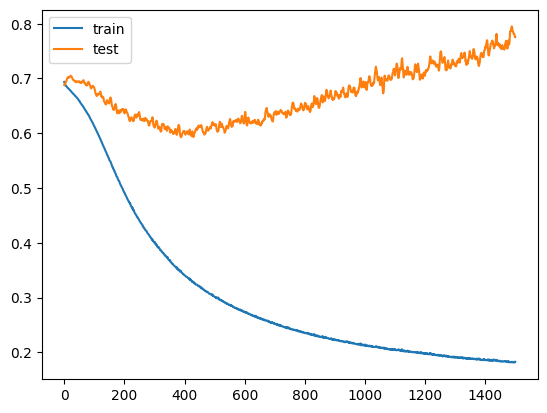

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [11]:
# as we can see there is lot's of overfitting

9600/9600 [==============================] - 15s 2ms/step


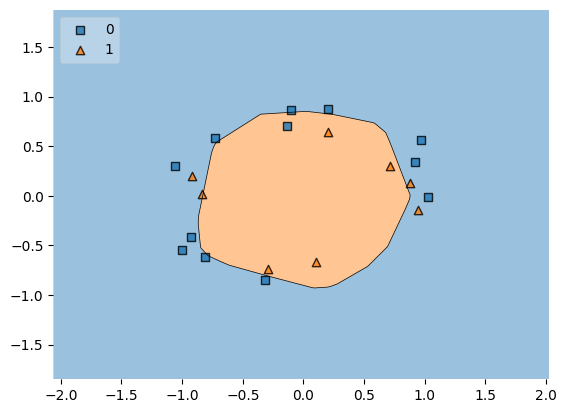

In [12]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [22]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               768       
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# here we by callback object tuning some perameters
callback = EarlyStopping(
                        monitor="val_loss",
                        min_delta=0.00001,
                        patience=5,
                        verbose=1,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=False
                            )

In [25]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=3500,
                    callbacks=callback
                    )

Epoch 1/3500
3/3 [==============================] - 1s 93ms/step - loss: 0.6993 - accuracy: 0.5250 - val_loss: 0.7003 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.6976 - accuracy: 0.5375 - val_loss: 0.7020 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6953 - accuracy: 0.5500 - val_loss: 0.7025 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.5500 - val_loss: 0.7031 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6925 - accuracy: 0.5500 - val_loss: 0.7035 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5750 - val_loss: 0.7036 - val_accuracy: 0.3500
Epoch 6: early stopping


In [26]:
# have a look it's stop in 26 epoch

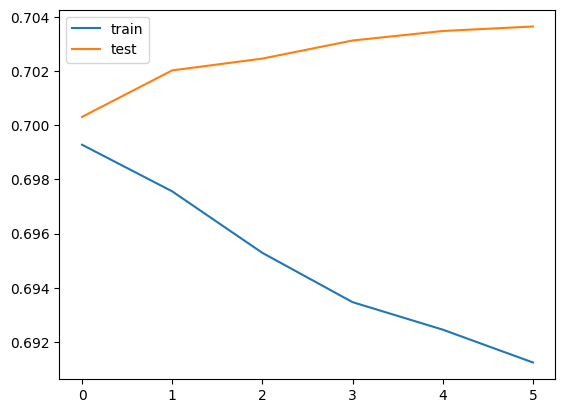

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 18s 2ms/step


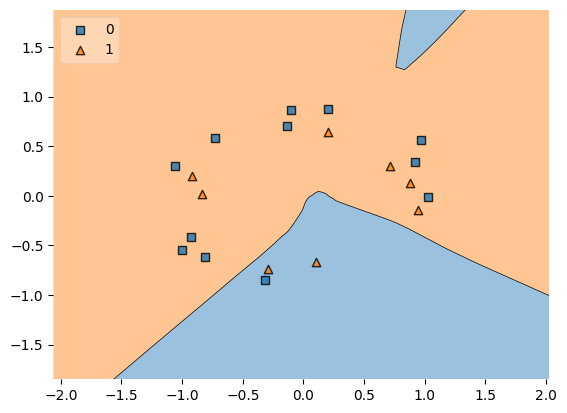

In [29]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()